 # [Module 2.5] AutoGluon 훈련 및 추론

이 노트북은 아래와 같은 작업을 합니다.
- 훈련, 검증 합쳐서 훈련 데이터 생성 (물리적으로 훈련 + 검증)
- AutoGluon 데이터 타입으로 변경
- AutoGluon 훈련
- 테스트 데이터 로딩 및 추론
- 모델 평가
- 피쳐 Importance 생성

In [1]:
import pandas as pd

In [2]:
%store -r auto_train_file
# %store -r val_file
%store -r auto_test_file

In [3]:
train_pd = pd.read_csv(auto_train_file)
test_pd = pd.read_csv(auto_test_file)

In [4]:
print("auto_train_file: ", train_pd.shape)
print("auto_train_file: ", test_pd.shape)

auto_train_file:  (53740, 20)
auto_train_file:  (13436, 20)


In [5]:
from IPython.display import display as dp
dp(train_pd.head(2))
dp(test_pd.head(2))

,classes,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,price,freight_value,product_weight_g,product_volume,order_weekday,order_day,order_month,te_product_id_mean_smoothed,te_product_category_name_english_mean_smoothed,te_seller_state_mean_smoothed,te_seller_city_mean_smoothed,te_seller_zip_code_prefix_mean_smoothed,te_customer_seller_city_mean_smoothed,te_customer_seller_state_mean_smoothed,te_customer_seller_zip_code_prefix_mean_smoothed
0,3,taubate,SP,12030,fashion_shoes,29.99,10.96,9000.0,2640.0,1,4,10,5.074929,313.325175,80621.001131,704.106277,289.234266,5.980614,35917.001966,5.074929
1,2,cuiaba,MT,78075,furniture_decor,23.90,26.82,1500.0,14625.0,1,4,10,4.074929,7805.012365,80621.001131,204.396123,40.117269,4.074929,614.204570,4.074929


,classes,customer_city,customer_state,customer_zip_code_prefix,product_category_name_english,price,freight_value,product_weight_g,product_volume,order_weekday,order_day,order_month,te_product_id_mean_smoothed,te_product_category_name_english_mean_smoothed,te_seller_state_mean_smoothed,te_seller_city_mean_smoothed,te_seller_zip_code_prefix_mean_smoothed,te_customer_seller_city_mean_smoothed,te_customer_seller_state_mean_smoothed,te_customer_seller_zip_code_prefix_mean_smoothed
0,3,joinville,SC,89219,watches_gifts,105.00,23.89,1000.0,7632.0,1,19,6,260.375634,6506.014877,4961.018757,2484.036771,365.281119,17.815563,175.544669,4.34846
1,0,diadema,SP,9950,housewares,99.97,15.80,650.0,9600.0,1,19,6,7.728837,6718.013196,10105.010047,391.201729,116.495153,5.074929,3818.025616,4.34846


In [6]:
import autogluon.core as ag
from autogluon.tabular import TabularPrediction as task

## 오토글루온 데이터 타입으로 변경

In [7]:
train_data = task.Dataset(file_path=auto_train_file)
subsample_size = train_data.shape[0]
# subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
print(train_data.head())

       classes         customer_city customer_state  customer_zip_code_prefix  \
588          2              matinhos             PR                     83260   
45386        3          ponta grossa             PR                     84010   
9427         3             sao paulo             SP                      3828   
46834        2  conceicao do castelo             ES                     29370   
2383         3                cuiaba             MT                     78070   

      product_category_name_english   price  freight_value  product_weight_g  \
588                  sports_leisure   59.99          18.00             525.0   
45386     construction_tools_lights  120.00          18.72            1300.0   
9427               office_furniture  189.99          23.91           12675.0   
46834                 watches_gifts   49.99          18.23             500.0   
2383            luggage_accessories  174.90          16.92             375.0   

       product_volume  order_wee

In [8]:
label_column = 'classes'
print("Summary of class variable: \n", train_data[label_column].describe())

Summary of class variable: 
 count    53740.000000
mean         2.178675
std          1.152687
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: classes, dtype: float64


## 오토글루운으로 훈련

In [9]:
%%time
dir = 'agModels-predictClass'  # specifies folder where to store trained models
time_limits = 7200 # seconds
# presets = 'best_quality'
presets = 'medium_quality_faster_train'

predictor = task.fit(train_data=train_data, label=label_column, 
                     output_directory=dir,
                     time_limits=time_limits,
                     presets=presets)



Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to agModels-predictClass/
AutoGluon Version:  0.0.15b20201025
Train Data Rows:    53740
Train Data Columns: 19
Preprocessing data ...
AutoGluon infers your prediction problem is: 'multiclass' (because dtype of label-column == int, but few unique label-values observed).
	5 unique label values:  [2, 3, 1, 0, 4]
	If 'multiclass' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Train Data Class Count: 5
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
Note: NumExpr detected 36 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.
	Available Memory:                    65826.95 MB
	Train Data (Original)  Memory Usage: 17.85 MB (0.0% of available memory)
	Inferring data type of each feature based on 

CPU times: user 32min 8s, sys: 18min 2s, total: 50min 11s
Wall time: 3min 3s


## 테스트 데이터 로딩

In [10]:
test_data = task.Dataset(file_path=auto_test_file)
y_test = test_data[label_column]  # values to predict
test_data_nolab = test_data.drop(labels=[label_column],axis=1)  # delete label column to prove we're not cheating
print(test_data_nolab.head())

Loaded data from: preproc_data/auto_feature_engineering/test.csv | Columns = 20 / 20 | Rows = 13436 -> 13436


    customer_city customer_state  customer_zip_code_prefix  \
0       joinville             SC                     89219   
1         diadema             SP                      9950   
2     teresopolis             RJ                     25963   
3  rio de janeiro             RJ                     21330   
4         vitoria             ES                     29090   

  product_category_name_english   price  freight_value  product_weight_g  \
0                 watches_gifts  105.00          23.89            1000.0   
1                    housewares   99.97          15.80             650.0   
2               books_technical   76.99          23.34            1850.0   
3                    cool_stuff   64.90          15.55             200.0   
4               furniture_decor   75.00          27.51            2550.0   

   product_volume  order_weekday  order_day  order_month  \
0          7632.0              1         19            6   
1          9600.0              1         19       

## 모델 예측

In [11]:
predictor = task.load(dir)  # unnecessary, just demonstrates how to load previously-trained predictor from file

prediction = predictor.predict(test_data_nolab)
print("Predictions:  ", prediction)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=prediction, auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.33484668055969036
Evaluations on test data:
{
    "accuracy": 0.33484668055969036,
    "accuracy_score": 0.33484668055969036,
    "balanced_accuracy_score": 0.20415256169106905,
    "matthews_corrcoef": 0.014208200928046998
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.5384615384615384,
        "recall": 0.020527859237536656,
        "f1-score": 0.03954802259887006,
        "support": 1705
    },
    "1": {
        "precision": 0.48760330578512395,
        "recall": 0.014175876982220087,
        "f1-score": 0.02755078216203596,
        "support": 4162
    },
    "2": {
        "precision": 0.3368323556653288,
        "recall": 0.9622932745314222,
        "f1-score": 0.49899948544965983,
        "support": 4535
    },
    "3": {
        "precision": 0.18478260869565216,
        "recall": 0.015682656826568265,
        "f1-score": 0.028911564625850334,
        "support": 2168
    },
    "4": {
        "precision": 0.

Predictions:   [2 2 2 ... 2 2 2]


## 리더 보드 생성

In [12]:
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetClassifier,0.366925,0.9712,1.223861,0.298117,151.146842,1.223861,0.298117,151.146842,0,True,1
1,ExtraTreesClassifierEntr,0.339908,0.9480,1.455262,0.111531,1.272983,1.455262,0.111531,1.272983,0,True,7
2,ExtraTreesClassifierGini,0.337973,0.9508,1.107671,0.112428,1.166847,1.107671,0.112428,1.166847,0,True,6
3,RandomForestClassifierEntr,0.336112,0.9700,0.300645,0.111138,1.840334,0.300645,0.111138,1.840334,0,True,5
4,RandomForestClassifierGini,0.335889,0.9696,0.207890,0.112538,1.350976,0.207890,0.112538,1.350976,0,True,4
5,LightGBMClassifierXT,0.335144,0.9644,0.097866,0.019596,1.886159,0.097866,0.019596,1.886159,0,True,9
6,LightGBMClassifier,0.334996,0.9740,0.021877,0.010291,0.523096,0.021877,0.010291,0.523096,0,True,8
7,CatboostClassifier,0.334847,0.9764,0.023008,0.011117,5.420321,0.023008,0.011117,5.420321,0,True,10
8,weighted_ensemble_k0_l1,0.334847,0.9764,0.025885,0.011922,6.020400,0.002877,0.000805,0.600080,1,True,12
9,LightGBMClassifierCustom,0.334549,0.9756,0.034737,0.010404,1.504907,0.034737,0.010404,1.504907,0,True,11


## 모델 평가

In [13]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, prediction)
f1_score = f1_score(y_test, prediction, average='macro')
print("accuracy: %.2f%%" % accuracy)
print("f1_score: %.2f%%" % f1_score)

accuracy: 0.33%
f1_score: 0.12%


[[  35   29 1628    8    5]
 [  21   59 4006   45   31]
 [   8   26 4364   90   47]
 [   0    5 2109   34   20]
 [   1    2  849    7    7]]


<Figure size 432x288 with 0 Axes>

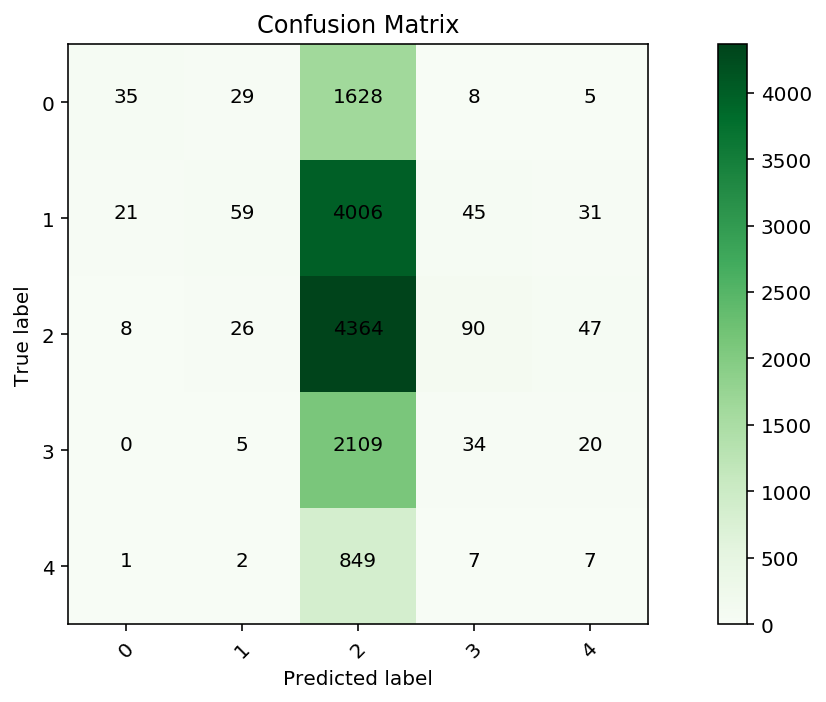

In [14]:
from utils import plot_conf_mat


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

cm = confusion_matrix(y_true= y_test, y_pred= prediction)

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plot_conf_mat(cm, 
              classes=['0','1', '2', '3', '4'], 
              title='Confusion Matrix')
plt.show()

## Feature Importance

Computing raw permutation importance for 19 features on weighted_ensemble_k0_l1 ...
	0.62s	= Expected runtime
	0.59s	= Actual runtime


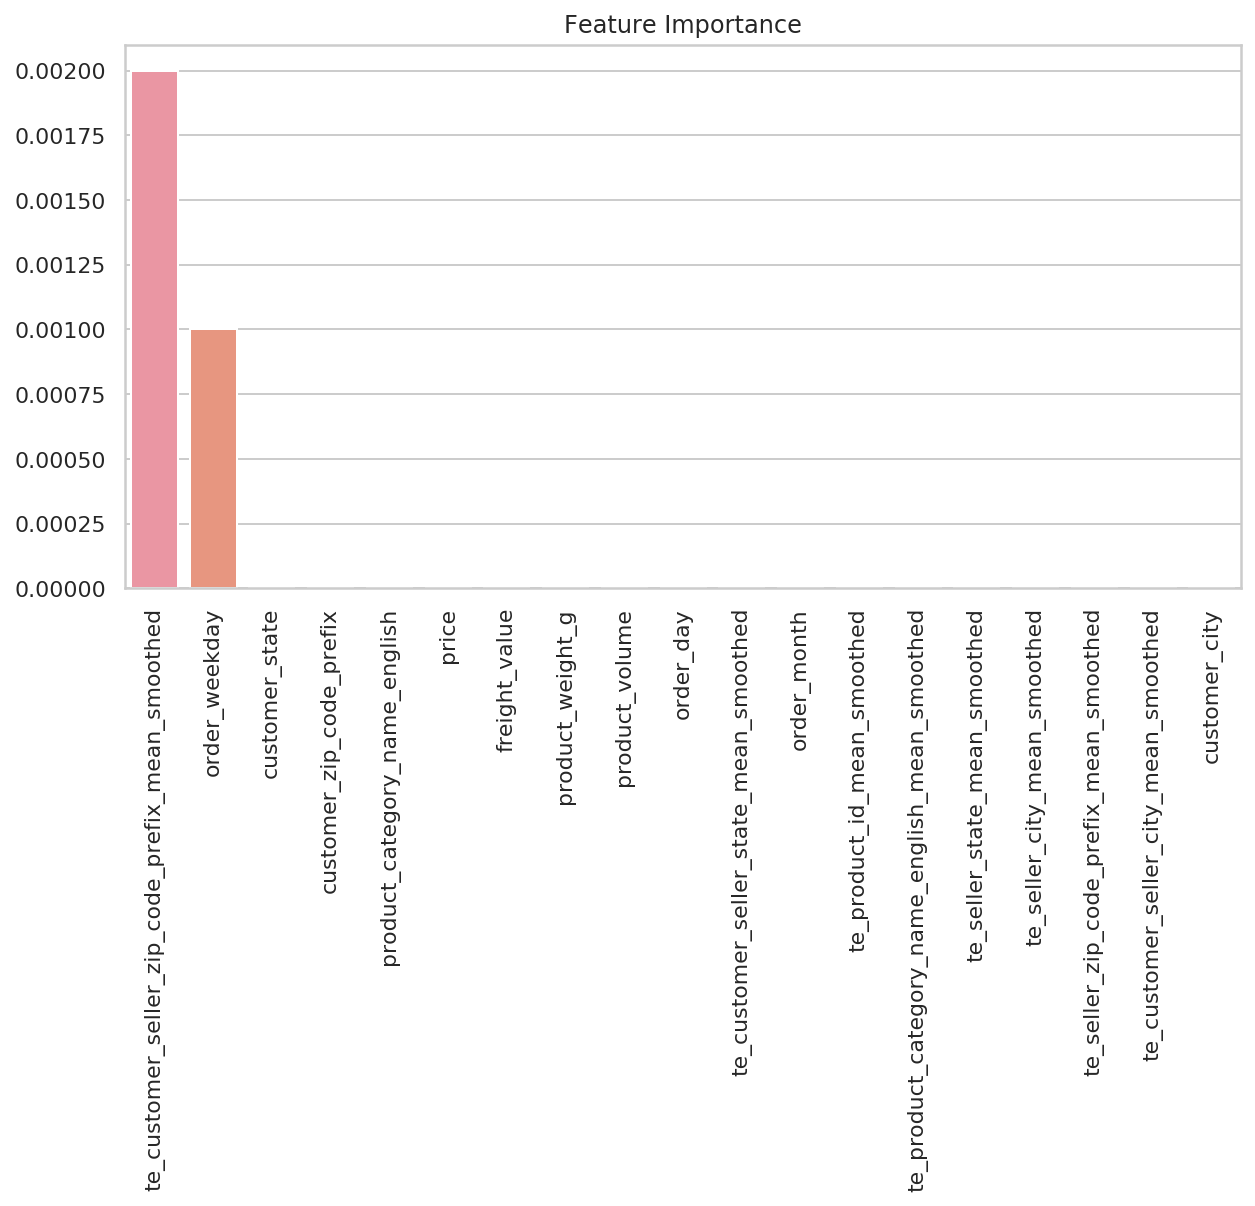

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

fea_importance = predictor.feature_importance(test_data)

f, ax = plt.subplots(figsize=(10,5))
plot = sns.barplot(x=fea_importance.index, y = fea_importance.values)
# plot = sns.barplot(x=features, y= fea_importance)
ax.set_title('Feature Importance')
plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
plt.show()